In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Opening my data file
data = pd.read_csv('data/measurements.csv')
data2 = pd.read_excel('data/measurements2.xlsx')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.shape

(388, 12)

In [5]:
# Checking for null values
null_counts = data.isnull().sum()
null_counts

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
# Checking for my data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [7]:
# Check unique values for categorical columns
"""counts = {}
for column in data:
    counts[column] = data[column].value_counts()
    print(f"\n{column}:\n{counts[column]}")"""
#checked and marked after doing it

'counts = {}\nfor column in data:\n    counts[column] = data[column].value_counts()\n    print(f"\n{column}:\n{counts[column]}")'

In [8]:
# Cleaning
data["distance"]=data["distance"].str.replace(',', '.')
data["consume"]=data["consume"].str.replace(',', '.')
data["temp_inside"]=data["temp_inside"].str.replace(',', '.')
data["refill liters"]=data["refill liters"].str.replace(',', '.')

data["distance"]=data["distance"].astype(float)
data["consume"]=data["consume"].astype(float)
data["temp_inside"]=data["temp_inside"].astype(float)
data["refill liters"]=data["refill liters"].astype(float)

data["temp_inside"]=data["temp_inside"].fillna(np.mean(data["temp_inside"]))

print(data.dtypes)
print(data.isnull().sum())
data.head(10)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object
distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [9]:
# Visualization

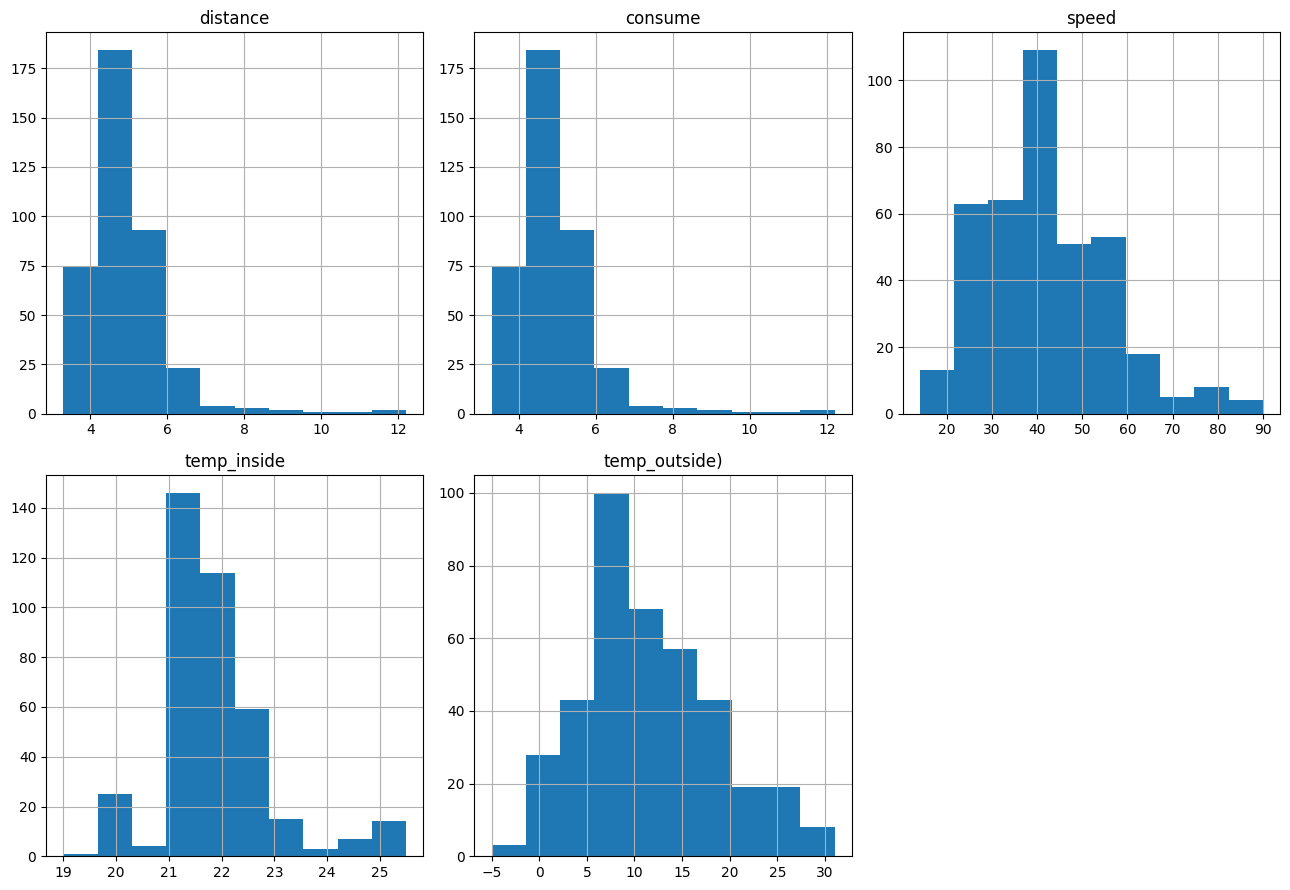

In [10]:
import matplotlib.pyplot as plt

def plot_histograms(data):
    plt.figure(figsize=(13, 9))

    ax1 = plt.subplot(2, 3, 1)
    data.consume.hist(bins=10, ax=ax1)
    plt.title("distance")

    ax2 = plt.subplot(2, 3, 2)
    data.consume.hist(bins=10, ax=ax2)
    plt.title("consume")

    ax3 = plt.subplot(2, 3, 3)
    data.speed.hist(bins=10, ax=ax3)
    plt.title("speed")

    ax4 = plt.subplot(2, 3, 4)
    data.temp_inside.hist(bins=10, ax=ax4)
    plt.title("temp_inside")

    ax5 = plt.subplot(2, 3, 5)
    data.temp_outside.hist(bins=10, ax=ax5)
    plt.title("temp_outside)")

    plt.tight_layout()
    plt.show()

plot_histograms(data)


In [11]:
# Regression Model (Fuel Consumption)

In [12]:
# Handle missing values and convert to numeric types
data['temp_inside'] = pd.to_numeric(data['temp_inside'], errors='coerce')

# Select predictor variables
X_reg = data[['distance', 'speed', 'temp_inside']]

# Target variable
y_reg = data['consume']

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build a linear regression model
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = model_reg.predict(X_test_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error (Regression): {mse_reg}')


Mean Squared Error (Regression): 0.9337640291104131


In [13]:
# Classification Model (Gas Type):

In [14]:
# Encode categorical variables
le = LabelEncoder()
data['gas_type_encoded'] = le.fit_transform(data['gas_type'])

# Select predictor variables
X_class = data[['distance', 'speed', 'temp_inside']]

# Target variable
y_class = data['gas_type_encoded']

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Build a decision tree classifier
model_class = DecisionTreeClassifier()
model_class.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = model_class.predict(X_test_class)

# Evaluate the model
accuracy_class = accuracy_score(y_test_class, y_pred_class)
confusion_matrix_class = confusion_matrix(y_test_class, y_pred_class)

print(f'Accuracy: {accuracy_class}')
print(f'Confusion Matrix:\n{confusion_matrix_class}')


Accuracy: 0.6153846153846154
Confusion Matrix:
[[21 15]
 [15 27]]
